<a href="https://colab.research.google.com/github/SaddiManisha/heart_failure_perdiction_ML/blob/main/Heart_failure_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("my project is heart failure prediction")

my project is heart failure prediction


In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Download latest version
path = kagglehub.dataset_download("aadarshvelu/heart-failure-prediction-clinical-records")

print("Path to dataset files:", path)

100%|██████████| 28.6k/28.6k [00:00<00:00, 10.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aadarshvelu/heart-failure-prediction-clinical-records/versions/1


In [4]:
hr_df = pd.read_csv(path + "/heart_failure_clinical_records.csv")

In [5]:
hr_df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     55.0        0                       748         0                 45   
1     65.0        0                        56         0                 25   
2     45.0        0                       582         1                 38   
3     60.0        1                       754         1                 40   
4     95.0        1                       582         0                 30   
...    ...      ...                       ...       ...                ...   
4995  45.0        0                       582         1                 55   
4996  60.0        1                       582         0                 30   
4997  95.0        1                       112         0                 40   
4998  65.0        1                       160         1                 20   
4999  40.0        0                       244         0                 45   

      high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                       0  263358.03               1.3           137    1   
1                       0  305000.00               5.0           130    1   
2                       0  319000.00               0.9           140    0   
3                       1  328000.00               1.2           126    1   
4                       0  461000.00               2.0           132    1   
...                   ...        ...               ...           ...  ...   
4995                    0  543000.00               1.0           132    0   
4996                    1  127000.00               0.9           145    0   
4997                    1  196000.00               1.0           138    0   
4998                    0  327000.00               2.7           116    0   
4999                    1  275000.00               0.9           140    0   

      smoking  time  DEATH_EVENT  
0           1    88            0  
1           0   207            0  
2           0   244            0  
3           0    90            0  
4           0    50            1  
...       ...   ...          ...  
4995        0   250            0  
4996        0    95            0  
4997        0    24            1  
4998        0     8            1  
4999        0   174            0  

[5000 rows x 13 columns]

In [6]:
print(hr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB
None


In [7]:
display(hr_df.describe().T)

count           mean           std      min  \
age                       5000.0      60.288736     11.697243     40.0   
anaemia                   5000.0       0.474400      0.499394      0.0   
creatinine_phosphokinase  5000.0     586.760600    976.733979     23.0   
diabetes                  5000.0       0.439400      0.496364      0.0   
ejection_fraction         5000.0      37.734600     11.514855     14.0   
high_blood_pressure       5000.0       0.364800      0.481422      0.0   
platelets                 5000.0  265075.404370  97999.758622  25100.0   
serum_creatinine          5000.0       1.369106      1.009750      0.5   
serum_sodium              5000.0     136.808200      4.464236    113.0   
sex                       5000.0       0.645600      0.478379      0.0   
smoking                   5000.0       0.311800      0.463275      0.0   
time                      5000.0     130.678800     77.325928      4.0   
DEATH_EVENT               5000.0       0.313600      0.464002      0.0   

                               25%        50%       75%       max  
age                           50.0      60.00      68.0      95.0  
anaemia                        0.0       0.00       1.0       1.0  
creatinine_phosphokinase     121.0     248.00     582.0    7861.0  
diabetes                       0.0       0.00       1.0       1.0  
ejection_fraction             30.0      38.00      45.0      80.0  
high_blood_pressure            0.0       0.00       1.0       1.0  
platelets                 215000.0  263358.03  310000.0  850000.0  
serum_creatinine               0.9       1.10       1.4       9.4  
serum_sodium                 134.0     137.00     140.0     148.0  
sex                            0.0       1.00       1.0       1.0  
smoking                        0.0       0.00       1.0       1.0  
time                          74.0     113.00     201.0     285.0  
DEATH_EVENT                    0.0       0.00       1.0       1.0

In [8]:
print(hr_df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
print("Duplicate rows:", hr_df.duplicated().sum())

Duplicate rows: 3680


In [10]:
print(hr_df['DEATH_EVENT'].value_counts())

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64


In [11]:
num_cols = hr_df.select_dtypes(include=[np.number]).columns.tolist()

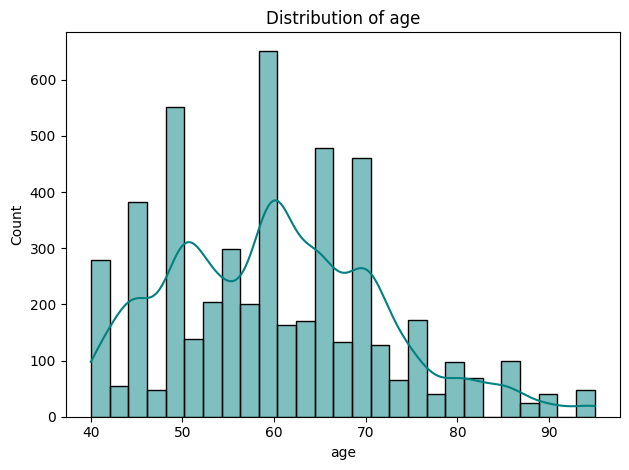

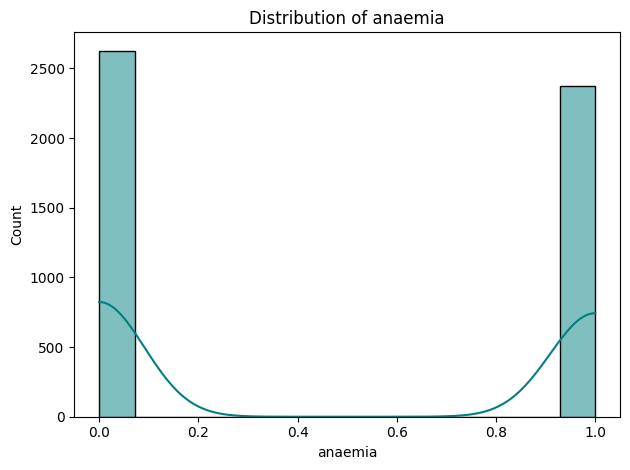

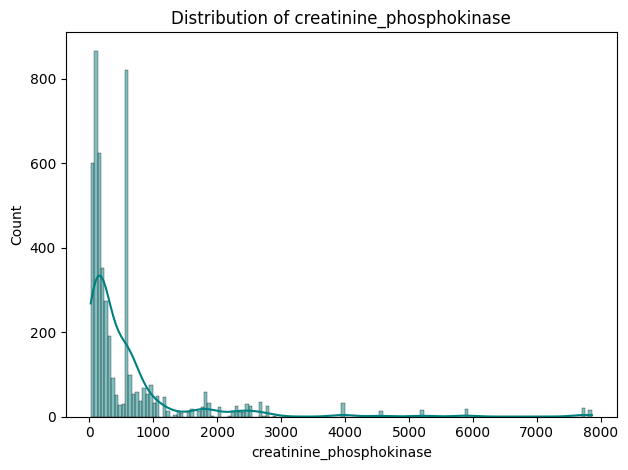

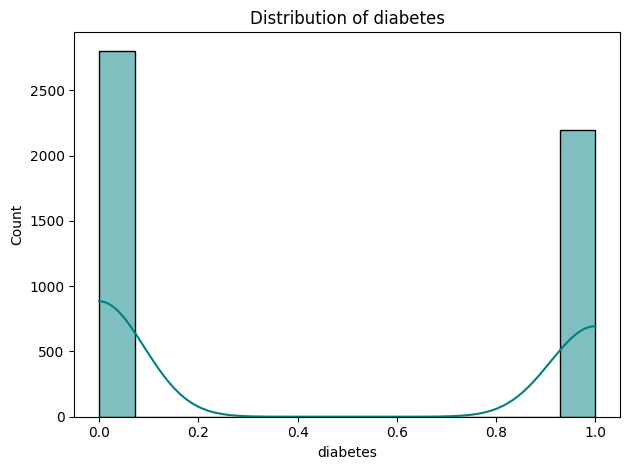

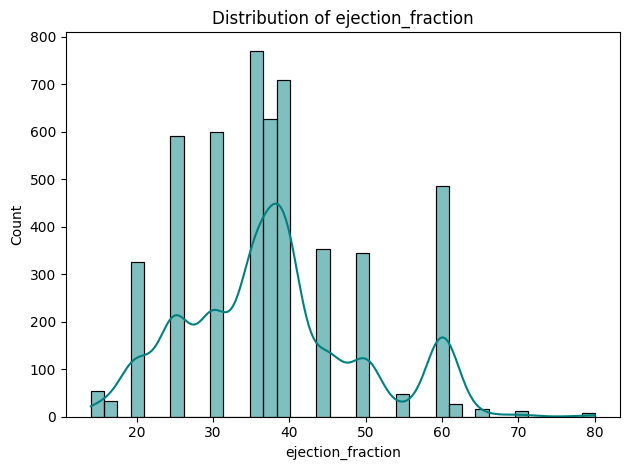

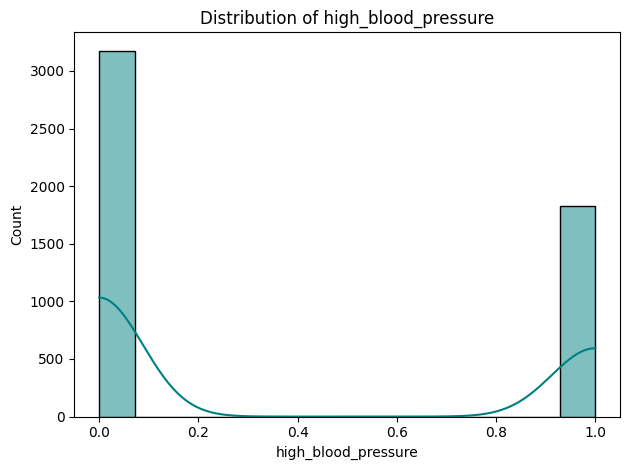

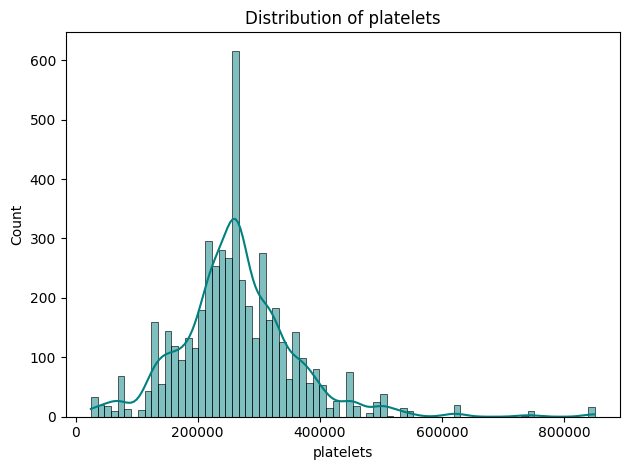

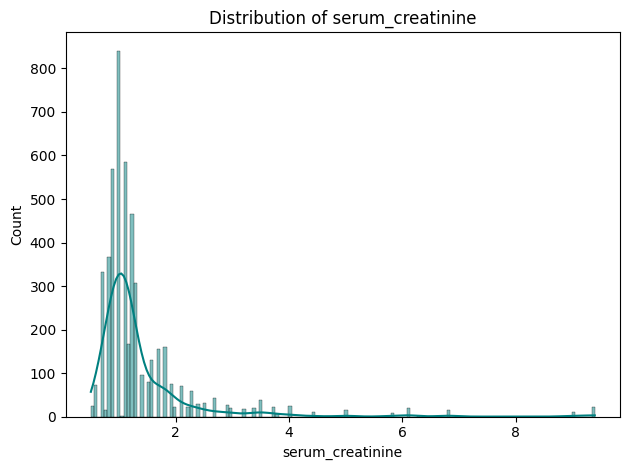

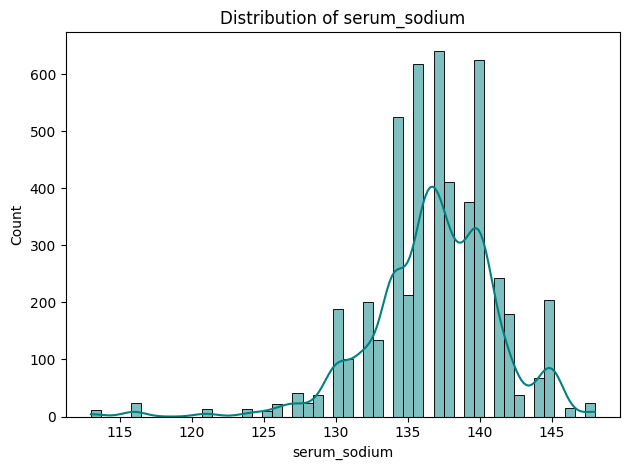

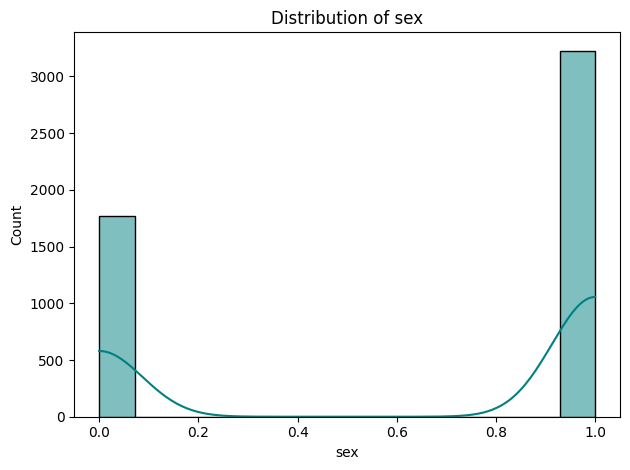

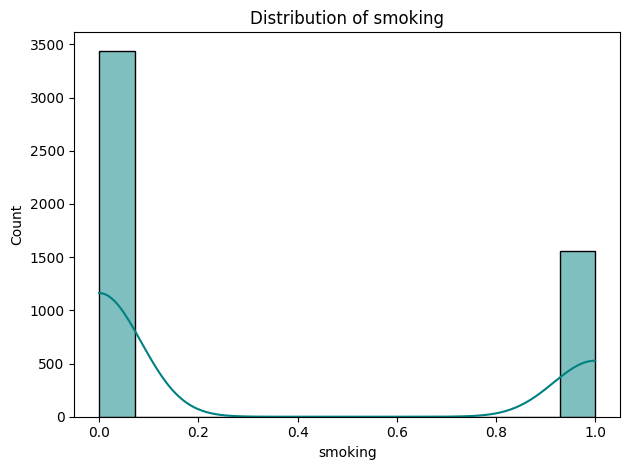

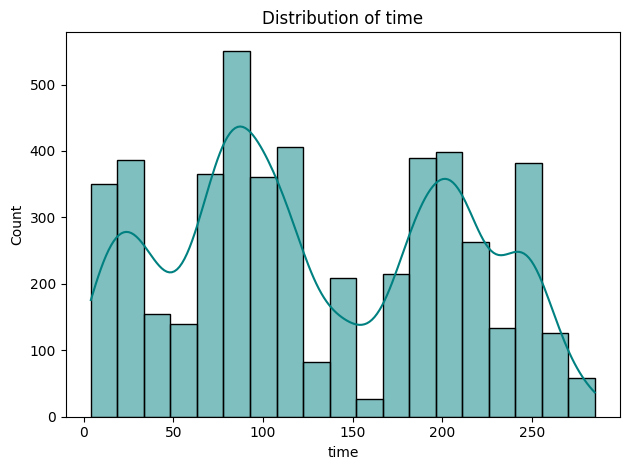

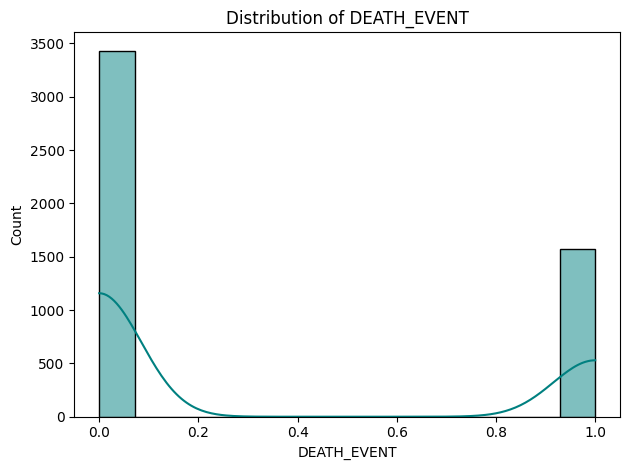

In [12]:
# Distributions of numeric features
for col in num_cols:
    sns.histplot(hr_df[col], kde=True, color="teal")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()